## Importing libraries

In [27]:
import pandas as pd
import numpy as np
import re

In [28]:
print(pd.__version__)
print(np.__version__)

2.3.3
2.4.0


## Importing dataset

In [29]:
df1 = pd.read_csv('../data/Fake.csv')
df2 = pd.read_csv('../data/True.csv')

df1['label'] = 0
df2['label'] = 1

In [30]:
df1.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [31]:
df2.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [32]:
df = pd.concat([df1, df2], axis=0)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df['content'] = df['title'] + ' ' + df['text']
df = df[['content', 'label']]

In [33]:
df.head()

,content,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,0
1,Trump drops Steve Bannon from National Securit...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,0
4,Donald Trump heads for Scotland to reopen a go...,1


## Splitting the dataset

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['content'], df['label'], test_size=0.2, random_state=42
)   

In [35]:
X_train

36335    BOILER ROOM: As the Frogs Slowly Boil – EP #40...
12384    New Venezuela oil boss to give military more P...
24419    Turkey says talk of ending its EU accession un...
24740    SENATOR GILLIBRAND Pulled Strings So Muslim At...
27039    Republican Trump says 'system is rigged' after...
                               ...                        
11284     Trump Just FAILED Hundreds Of Manufacturing W...
44732    Judge Garland not interested in FBI job: sourc...
38158     Expert On Voting Fraud DESTROYS Trump’s Lies ...
860      [Video] POLICE HAVE VERY GOOD REASON FOR BLOCK...
15795    BUSTED! WASHINGTON POST Skips Maxine Waters’ A...
Name: content, Length: 35918, dtype: object

In [36]:
y_train

36335    0
12384    1
24419    1
24740    0
27039    1
        ..
11284    0
44732    1
38158    0
860      0
15795    0
Name: label, Length: 35918, dtype: int64

In [37]:
X_test

22216     It’s Really Happening: Trump Adviser Lays Out...
27917    Republican attempt to deflect Trump-Russia pro...
25007    Trump says churches should get FEMA funds for ...
1377      Trump Loves To Say The New York Times Is ‘Fai...
32476    House Speaker Ryan briefed Trump on healthcare...
                               ...                        
42119    WOW! 83-YEAR OLD SENATOR Challenged By Teen To...
4068      Trump’s Longtime Adviser Officially Banned Fr...
22498    THINGS GET UGLY When White Guy Tries Social Ex...
14658    U.S. Senator Menendez's corruption trial to pr...
15236    Putin critic Navalny barred from Russian presi...
Name: content, Length: 8980, dtype: object

In [38]:
y_test

22216    0
27917    1
25007    1
1377     0
32476    1
        ..
42119    0
4068     0
22498    0
14658    1
15236    1
Name: label, Length: 8980, dtype: int64

## Data Preprocessing

In [39]:
# Removes characters that are not useful for text analysis
def remove_unwanted_chars(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # remove URLs
    text = re.sub(r'<.*?>', '', text) # remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text) # remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip() # remove extra spaces
    
    return text 

In [40]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Removes stopwords and lemmatizes the text
def lemmatize_text(text):
    doc = nlp(text)
    tokens = [
        token.lemma_
        for token in doc
        if not token.is_stop
    ]
    return ' '.join(tokens)

In [41]:
def preprocess_text(text):
    text = text.lower()
    text = remove_unwanted_chars(text)
    text = lemmatize_text(text)
    return text

## Defining the complete ML pipeline

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [43]:
# define the complete ML pipeline steps for this baseline model
pipeline = Pipeline([
    (
        'tfidf', 
        TfidfVectorizer(
            preprocessor=preprocess_text,
            max_df=0.9,
            min_df=5,
            ngram_range=(1, 2)
        )
    ),
    (
        'clf', 
        LogisticRegression(
            solver='liblinear', 
            max_iter=1000,
            random_state=42
        )
    ),
])

## Training the Model

In [44]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('tfidf', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",<function pre...t 0x1196d3ec0>
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


## Predicting results on test set

In [45]:
y_pred = pipeline.predict(X_test)

In [46]:
print(np.concatenate([y_test.values.reshape(-1,1), y_pred.reshape(-1,1)], axis=1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [1 1]]


## Evalution

In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9857


In [48]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])
print(report)

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      4710
        Real       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



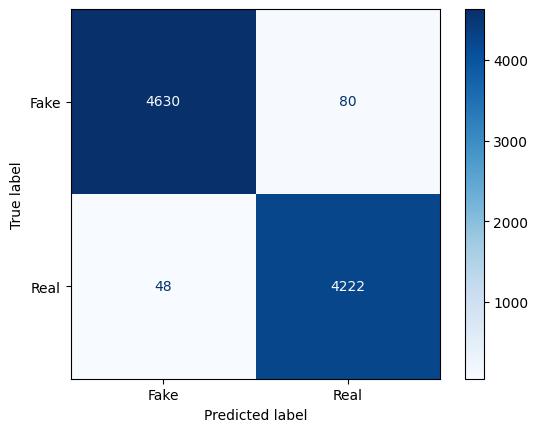

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')